In [1]:
import pandas as pd

In [2]:
df_house=pd.read_csv("resources/resources/housing.csv") #1.adım verileri okuma

In [3]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#2.adım veri hakkında bilgi sahibi 
df_house.info()
#4   total_bedrooms      20433 non-null  float64-->>  boşsa böyle de görebiliriz 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#tüm alanlardaki veriler dolu mu
df_house.isnull().sum()
#total_bedrooms -> 207 tanesi boş

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df_house[df_house["total_bedrooms"].isnull()] #hangi kayıtlar boş,onları gösterdi

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
#3.adım Eğer null kayıtlar varsa,bunlara nasıl davranılacağı karar verilir.
# a ortalama
# b median
# c linear interpolation;
#Sözelse en çok tekrar eden veriyle doldur
#veri miktarı çoksa sil gitsin

In [8]:
df_house["total_bedrooms"].mean(), df_house["total_bedrooms"].median() #ortalama ve medyan

(537.8705525375618, 435.0)

In [9]:
import matplotlib.pyplot as plt

(array([1.5304e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 6.4540e+02, 1.2898e+03, 1.9342e+03, 2.5786e+03,
        3.2230e+03, 3.8674e+03, 4.5118e+03, 5.1562e+03, 5.8006e+03,
        6.4450e+03]),
 <BarContainer object of 10 artists>)

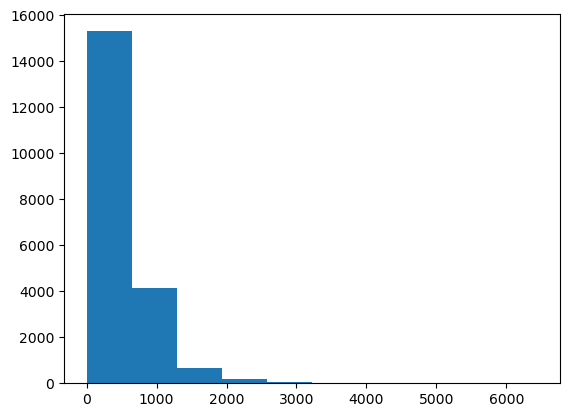

In [10]:
plt.hist(df_house["total_bedrooms"]) #histogramını çizdik


<AxesSubplot:>

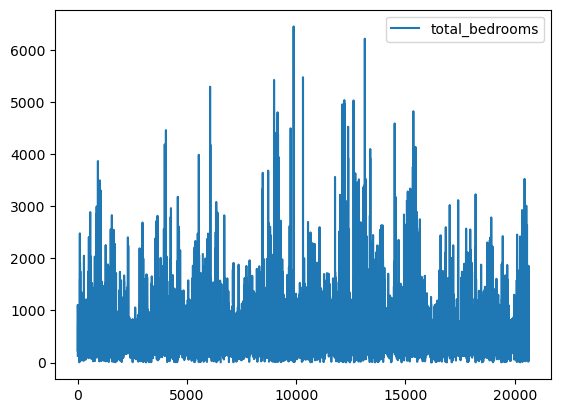

In [11]:
df_house.plot(y="total_bedrooms")
#x ekseni kaç tane değer var 
#y ekseni değerleri gösteriyo

In [12]:
df_house.describe().T #Lineer interpolasyon kullanmak daha mantıklıdır çünü min max aralığı çok fazla

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [13]:
import seaborn as sns

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

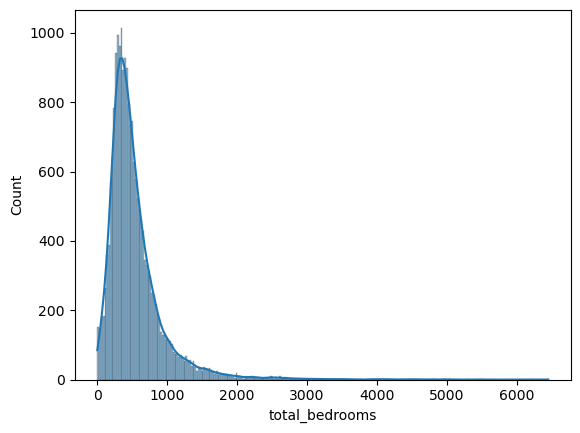

In [14]:
sns.histplot(data=df_house,x="total_bedrooms",kde=True) #kde=True dağılım grafiğini de çizer

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

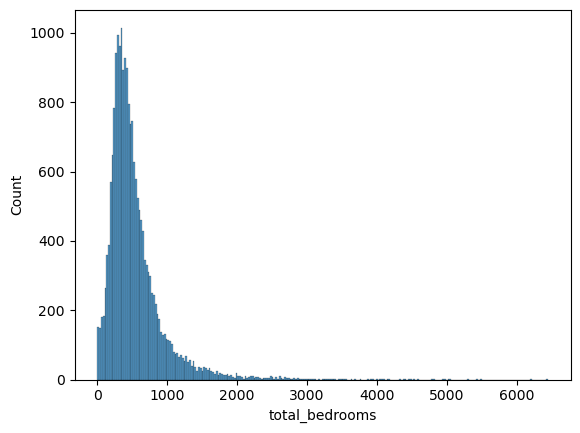

In [15]:
sns.histplot(data=df_house,x="total_bedrooms",kde=False)

In [16]:
 df_house.dropna(inplace=True) #boş olan kayıtları sildik

In [17]:
df_house[df_house["total_bedrooms"].isnull()] #nan alan var mı dedik yok dedi

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [18]:
df_house.info() #silme başarılı 20433 kayıt kaldı

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
#Genelde elimizde veriler varsa veriler şöyle düşünülür:
#1-Giriş değişkeni     2-Çıkış değişkeni  ->> girişler çıkışı tahmin etmek için kullandığımız değişkenlerdir
#input                 output
#independent           dependent  -> bağımlı bağımsız değişkeni
# X-> girişler         y->çıkışlar ı gösterir
#genelde çıkkış değişkeni en sonda görülür tabloda


In [20]:
df_house.columns #columnları gördük

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [21]:
#median_house_value yu en sağa taşı 

In [22]:
#exceldeki cut past işlemi
df_X=df_house.drop("median_house_value",axis=1) #median_house_value yu dropladı geri kalanları df_X(giriş) e kopyaladı
df_y=df_house["median_house_value"] #median_house_value yu direkt eşitledi
df_house=df_X.join(df_y) #join işlemi yapıp df_x in son satırına df_y yi taşıdı ve df_house diye yeni bir dataframe e atadı
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


In [23]:
#korelasyon -1e yakınlaştıkça biri artarken diğeri azalır
#1e yaklaştıkça doğru orantı var ikiside aynı anda artar ya da azalır 
#0 sa korelasyon ilişki yok
df_house.corr() #korelasyon tablosunu verir

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<AxesSubplot:>

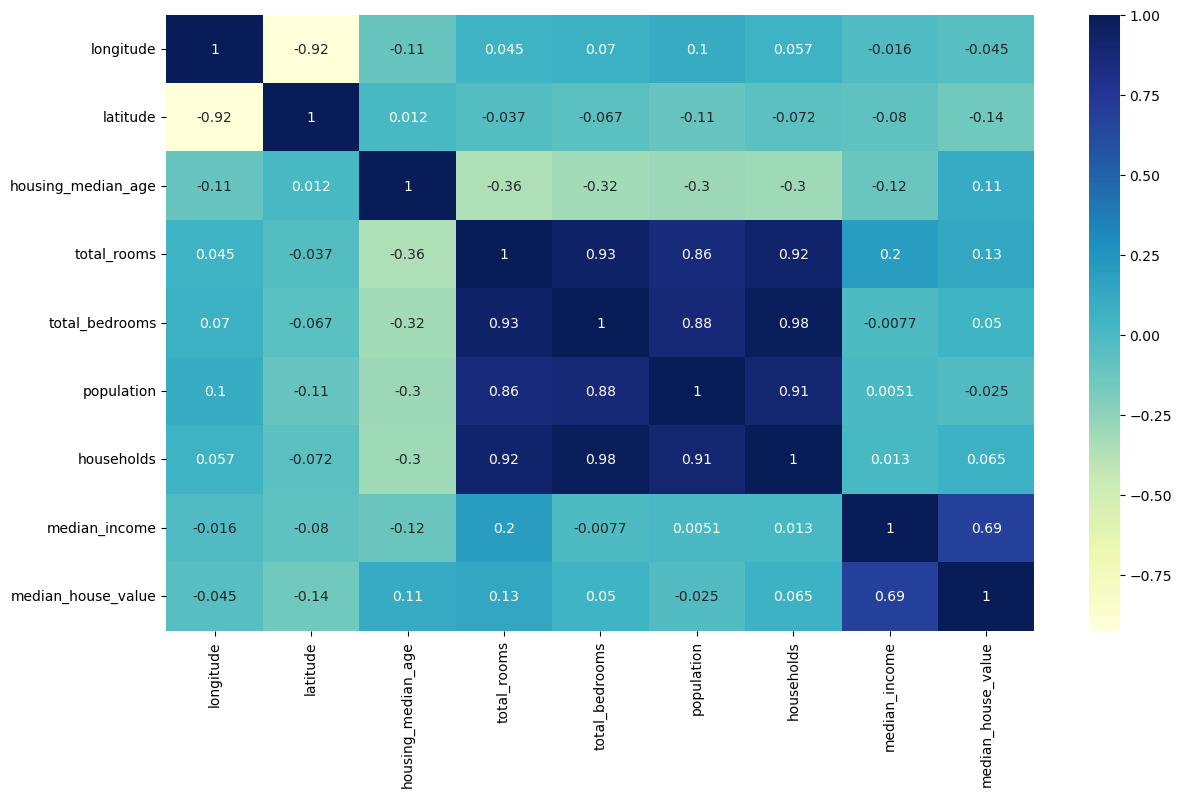

In [24]:
plt.figure(figsize=(14,8)) #iç içe geçmesin diye düzenledik
sns.heatmap(df_house.corr(),annot=True,cmap="YlGnBu") #korelasyon tablosu
#annot True ile üzerinde değerleri de gösterir.
#heatmap->sıcaklık haritası
#cmap le harita rengini değiştirebiliriz

In [25]:
#giriş değişkenleri kendi arasında yüksek korelasyona sahip olmamalı. Yüksek korelasyon->>+1 e yakın
#+1 e yakın olursa çoklu doğrusal bağlantı problemi. Böyle bi durum varsa iki değişkenden birini kullansak yeter.
#Düşük korelasyon ->> -1

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

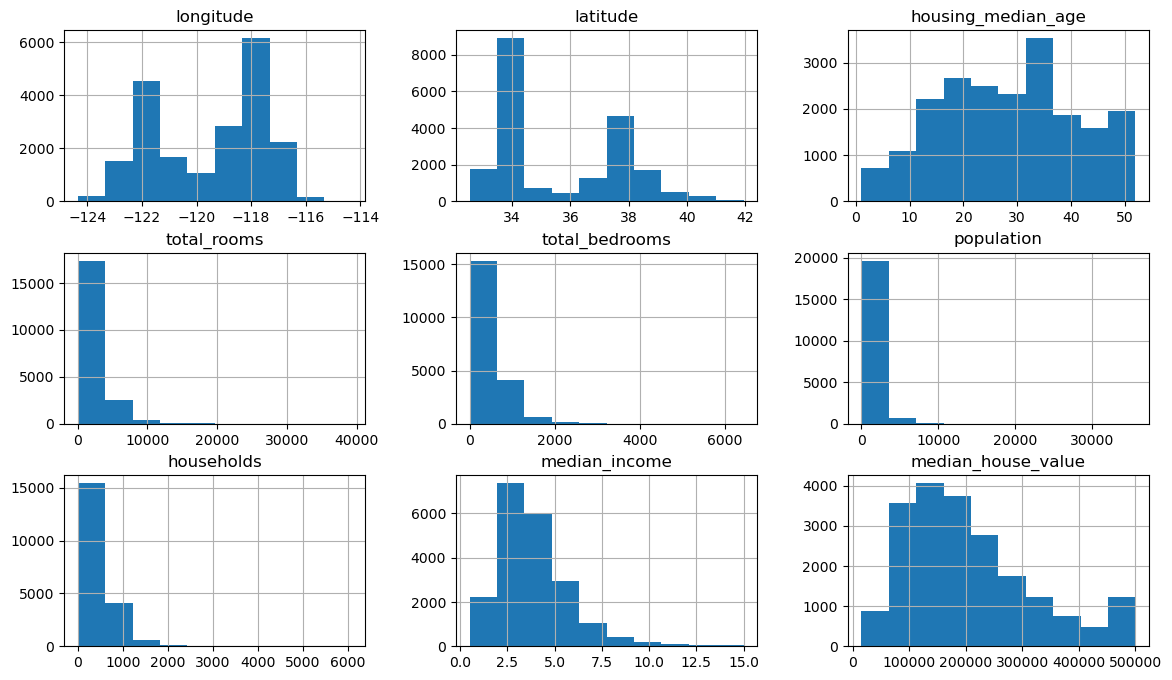

In [26]:
df_house.hist(figsize=(14,8))

In [27]:
import numpy as np #log direkt ln alır. numpy ı log alabilmek için kullandık
df_house["total_rooms"]=np.log(df_house["total_rooms"])+1
df_house["total_bedrooms"]=np.log(df_house["total_bedrooms"])+1
df_house["population"]=np.log(df_house["population"])+1
df_house["households"]=np.log(df_house["households"])+1

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

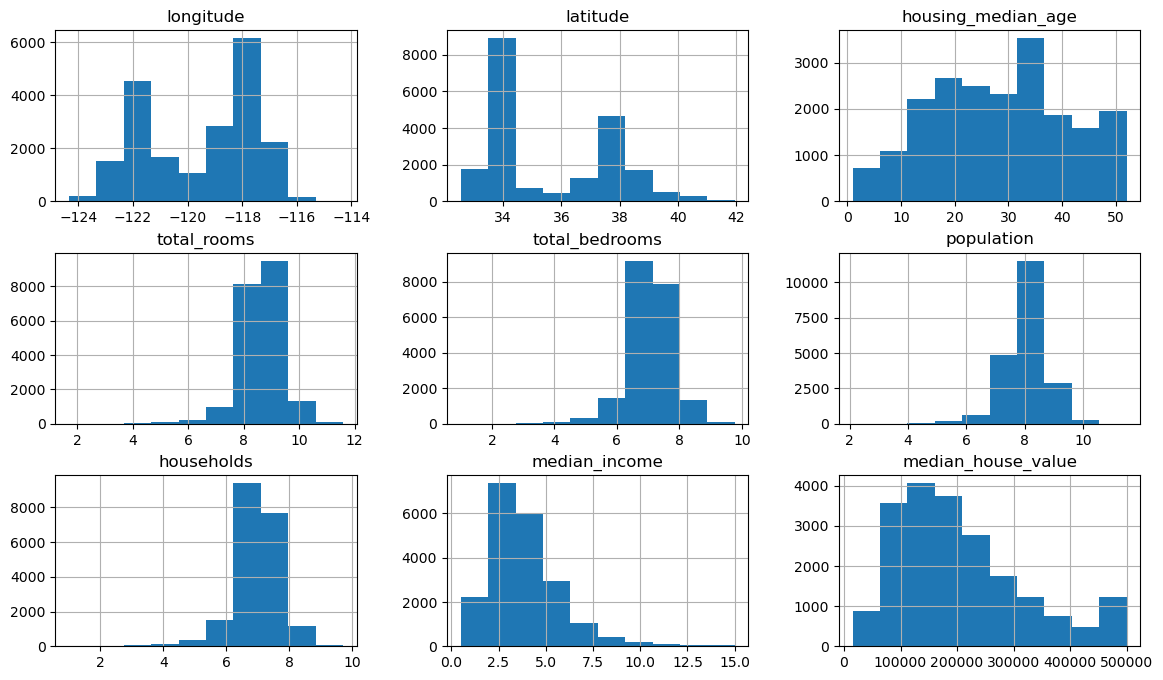

In [28]:
df_house.hist(figsize=(14,8)) #her columnn un ayrı ayrı histogram grafiğini verir

<AxesSubplot:>

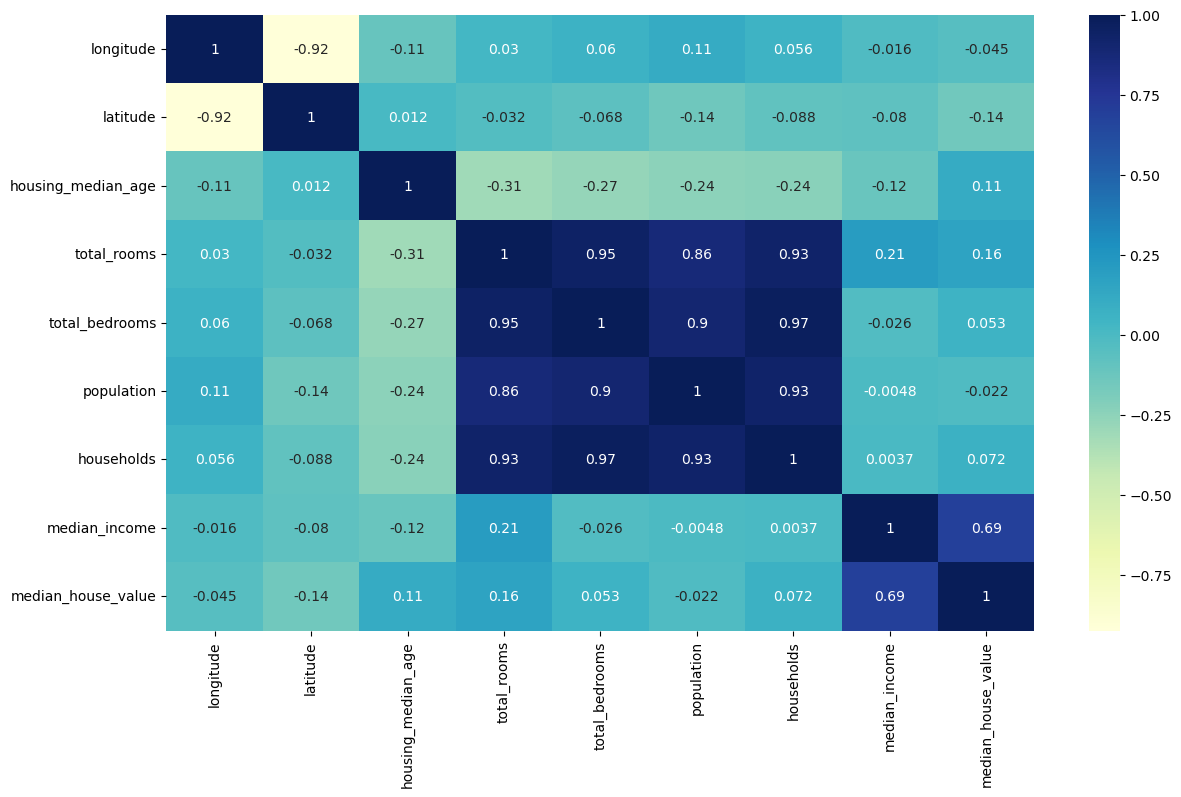

In [29]:
plt.figure(figsize=(14,8)) #iç içe geçmesin diye düzenledik
sns.heatmap(df_house.corr(),annot=True,cmap="YlGnBu")
#aralarındaki yüksek ilişki azalmadığı için ilgili sütunları droplayacağız

In [30]:
df_house.drop(['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms','population',"households"],
            axis=1,inplace=True)
#droplama işlemini gerçekleştirdik
df_house.head()

,median_income,ocean_proximity,median_house_value
0,8.3252,NEAR BAY,452600.0
1,8.3014,NEAR BAY,358500.0
2,7.2574,NEAR BAY,352100.0
3,5.6431,NEAR BAY,341300.0
4,3.8462,NEAR BAY,342200.0


In [31]:
df_house["ocean_proximity"].unique() #Sözel veri regresyon yapamayız

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
pd.get_dummies(df_house.ocean_proximity) #ne kadar farklı değer varsa ona göre matris oluşturuyor

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [33]:
df_house=df_house.join(pd.get_dummies(df_house.ocean_proximity)) 
#sözel veriyi sayısal olarak ifade etmek için .get_dummies() kullandı 
#ve df_house ile birleştirip df_house dataframe ine kaydetti
df_house

,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,8.3252,NEAR BAY,452600.0,0,0,0,1,0
1,8.3014,NEAR BAY,358500.0,0,0,0,1,0
2,7.2574,NEAR BAY,352100.0,0,0,0,1,0
3,5.6431,NEAR BAY,341300.0,0,0,0,1,0
4,3.8462,NEAR BAY,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
20635,1.5603,INLAND,78100.0,0,1,0,0,0
20636,2.5568,INLAND,77100.0,0,1,0,0,0
20637,1.7000,INLAND,92300.0,0,1,0,0,0
20638,1.8672,INLAND,84700.0,0,1,0,0,0


In [34]:
df_house.drop("ocean_proximity",axis=1,inplace=True) #ocean_proximity columnunu sildi. Artık sözel column kalmadı elimizde
df_house

,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,8.3252,452600.0,0,0,0,1,0
1,8.3014,358500.0,0,0,0,1,0
2,7.2574,352100.0,0,0,0,1,0
3,5.6431,341300.0,0,0,0,1,0
4,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...
20635,1.5603,78100.0,0,1,0,0,0
20636,2.5568,77100.0,0,1,0,0,0
20637,1.7000,92300.0,0,1,0,0,0
20638,1.8672,84700.0,0,1,0,0,0


In [35]:
#veriler train ve test olmak ,üzere iki gruba ayrılır
#train eğittiğimiz veriler, test ise test yaptığımız veriler.
#test verileri 1 e ne kadar yakınsa o kadar gerçekçi bir sonuç alırız
#1.Random
#2.Elle %80 Train,%20 Test
#cross validation-> bir başka doğrulama yöntemidir.veriler n kümeye böülünür
#örneğin ne=5 olsun
# 1 2 3 4 5
#1.adımda 1.küme test [2,3,4,5] eğititm için kullanılır.Metrikler bulunur.
#2.adımda 2.küme test [1,3,4,5] eğititm için kullanılır.Metrikler bulunur.
#3.adımda 3.küme test [1,2,4,5] eğititm için kullanılır.Metrikler bulunur.
#4.adımda 4.küme test [1,2,3,5] eğititm için kullanılır.Metrikler bulunur.
#5.adımda 5.küme test [1,2,3,4] eğititm için kullanılır.Metrikler bulunur.

<AxesSubplot:>

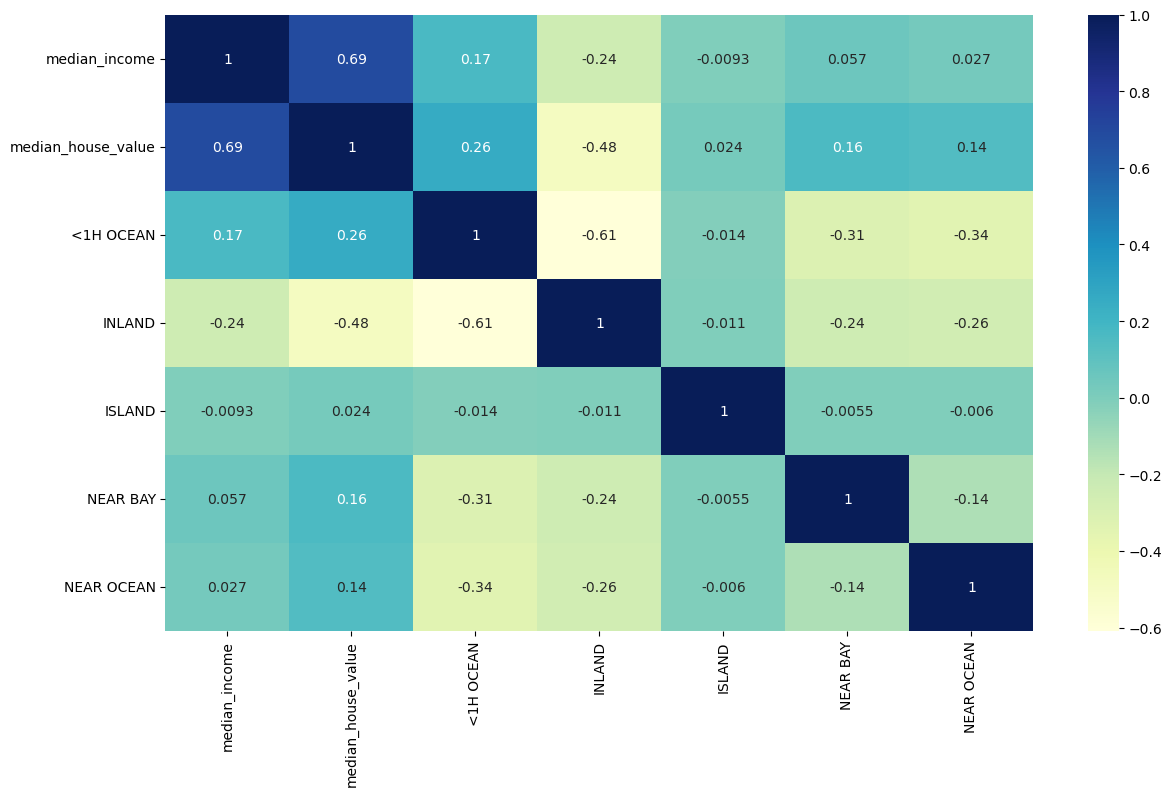

In [36]:
plt.figure(figsize=(14,8)) #iç içe geçmesin diye düzenledik
sns.heatmap(df_house.corr(),annot=True,cmap="YlGnBu") 
#düzelttik sıkıntı kalmadı

In [37]:
from sklearn.model_selection import train_test_split #train ve test verilerini oluşturan modeli sağlar.

In [38]:
X=df_house.drop("median_house_value",axis=1) #X e "median_house_value" u droplayıp geri kalan sütunlara eşitledi
y=df_house["median_house_value"] #y "median_house_value"u atadı

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#train ve test verileri olmak üzere veriyi ikiye ayırdı.
#test_size tüm verilerin yüzde kaçının test verisi olacağını belirlememizi sağlar. 

In [40]:
from sklearn.linear_model import LinearRegression #liner regresyon öğrenmesini sağlayan modelin kütüphanesi

In [41]:
model=LinearRegression()
#modelleri oluşturmak için fit metoduy kullanılır

In [42]:
model.fit(X_train,y_train) #.fit ile modelimizi train verileriyle eğittik
#train girişini ve çıkışını verdik

LinearRegression()

In [43]:
model.coef_ #columnların katsayıları.Columnları aşağıda bastık
#y=ax1+bx2+cx3...
#formülle alakalı, çok önemli bi şey değil

array([  37042.78919954,  -43061.24600151, -121026.37632293,
        216061.51331833,  -24702.95813541,  -27270.93285848])

In [44]:
X.columns #x in columnlarını getirdi

Index(['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [45]:
#sondaki sabit değeri intercept_ ile buluruz
model.intercept_ #formülle alakalı, çok önemli bi şey değil

126758.23835447579

In [46]:
#modelimiz ne kadar başarılı????????????
y_predict=model.predict(X_test)
#eğittiğimiz modeli (train), test verileriyle tahmin ettiriyoruz. Bunu bize .predict() sağlıyor

In [47]:
#R^2 value yı bulmalıyız rkare 1 e ne kadar yakınsa o kadar iyi 0 a ne kadar yakınsa o kadar kötü  0<=R^2<=1
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test,y_predict) #gerçek değerlerle bizim x değerlerinden tahmin ettiğimiz değerleri karşılaştıryor
# ve modelimiz ne kadar iyi olduğunu veriyor
# sonuç 1 e ne kadar yaklaşırsa o kadar iyi bir modelimiz var demek

0.5886326488975673

<AxesSubplot:xlabel='median_house_value'>

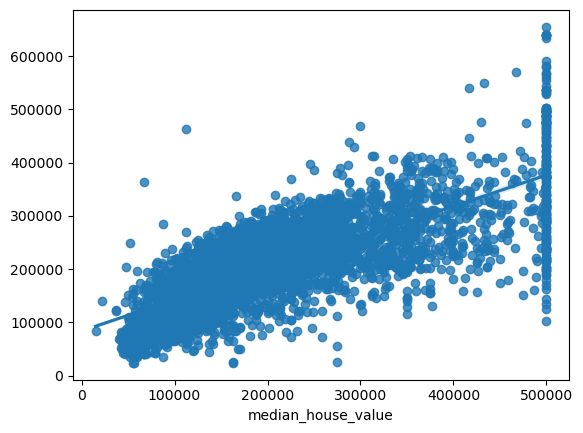

In [49]:
sns.regplot(x=y_test,y=y_predict) #regresyon  değerlerini görebiliriz
#doğruya yakın değerler fazlaysa modelimiz iyidir deriz

In [50]:
y_predict #X_test verilerinden modelimizin tahmin ettiği

array([217424.13774948, 171946.56144879, 203111.83189551, ...,
       100468.79540937, 134803.75671842, 185622.90322168])

In [51]:
y_test #gerçek veriler

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
8291     500001.0
6274     157900.0
2997     100200.0
13440    127700.0
14797    133700.0
Name: median_house_value, Length: 4087, dtype: float64